In [1]:
import pandas as pd;
import sklearn as skl;
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table("eucalyptus.txt",header=0,sep =" ")
reg = LinearRegression() 
x= np.c_[np.ones(1429),data["circ"]]
y= data["ht"]
reg.fit(x,y)
#retreiving the intercept
print(reg.intercept_)
#retreiving the slope
print(reg.coef_)
#conclusion B^ = (0,0.25) thus  m1:ht = 0+0.25*circ

9.037475668452764
[0.         0.25713786]


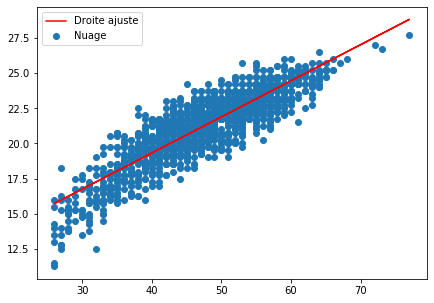

In [3]:
y_hat = reg.predict(x)
plt.figure(figsize=(7,5))
plt.scatter(data["circ"],y, label= "Nuage")
plt.plot(data["circ"],y_hat, label = "Droite ajuste", color="red")
plt.legend(loc ="best")
plt.show()

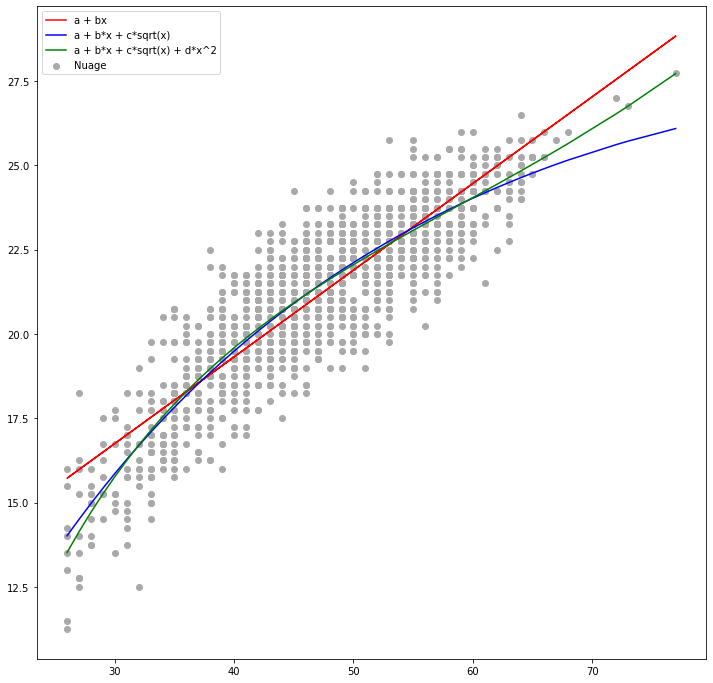

In [7]:

#sorting the values to have  good graph
data = pd.read_table("eucalyptus.txt",header=0,sep =" ")
data2= data.sort_values('circ')
y2= data2["ht"]

x2 = np.c_[np.ones(1429),np.sqrt(data2["circ"]), data2["circ"]]
reg2= LinearRegression() 
reg2.fit(x2,y2)
y_hat2 = reg2.predict(x2)

x3 = np.c_[np.ones(1429),np.sqrt(data2["circ"]), data2["circ"], np.square(data2["circ"])]
reg3= LinearRegression() 
reg3.fit(x3,y2)
y_hat3 = reg3.predict(x3)
                      

plt.figure(figsize=(12,12))
plt.scatter(data["circ"],y, label= "Nuage", color ="darkgray")
plt.plot(data["circ"],y_hat, label = "a + bx", color="red")
plt.plot(data2["circ"],y_hat2, label = "a + b*x + c*sqrt(x)", color="blue")
plt.plot(data2["circ"],y_hat3, label = "a + b*x + c*sqrt(x) + d*x^2", color="green")
plt.legend(loc ="best")
plt.show()

In [5]:
#calculeate R^2 for the two models
def R_squared(y,y_hat):
    y_bar = y_hat.mean()
    SCR = np.sum(np.square(y - y_hat))
    SCT = np.sum(np.square(y - y_bar))
    return 1 - (SCR/SCT)
print("a + bx: R_Squared:"+str(R_squared(y,y_hat)))
print("a + b*x + c*sqrt(x): R_Squared:"+str(R_squared(y2,y_hat2)))
print("a + b*x + c*sqrt(x) + d*x^2: R_Squared:"+str(R_squared(y2,y_hat3)))

a + bx: R_Squared:0.7683202384330652
a + b*x + c*sqrt(x): R_Squared:0.7921903882554493
a + b*x + c*sqrt(x) + d*x^2: R_Squared:0.7941034029626697


In [6]:
print(reg.score(x,y))
print(reg.coef_)
print(reg2.score(x2,y2))
print(reg2.coef_)
print(reg3.score(x3,y2))
print(reg3.coef_)


0.7683202384330652
[0.         0.25713786]
0.7921903882554493
[ 0.          9.98688814 -0.48294547]
0.7941034029626697
[ 0.00000000e+00  3.02868608e+01 -2.77594347e+00  8.46121691e-03]
